In [0]:
!pip install networkx 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 19.4 MB/s eta 0:00:00

[notice] A new release of pip available: 22.2.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


# Prepare libraries and data

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns

# Plotting libraries
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib import cm

# scikit-learn
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#Global Functions

In [0]:
random_seed = 42
plt.style.use('seaborn-white') 

#Creating the dataset

In [0]:
X, y = make_blobs(n_samples=200, n_features=2, centers=1, cluster_std=0.15, random_state=random_seed)
# center at the origin
X = X - np.mean(X, axis=0)

X1, y1 = make_circles(n_samples=[600, 200], noise=0.04, factor=0.5, random_state=random_seed)
# add 1 to (make_circles) labels to account for (make_blobs) label
y1 = y1 + 1
# increase the radius
X1 = X1*3

X = np.concatenate((X, X1), axis=0)
y = np.concatenate((y, y1), axis=0)

###Visualizing the dataset,

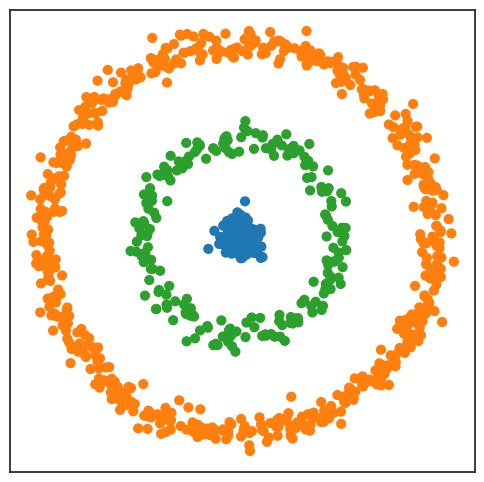

In [0]:
plot_colors = cm.tab10.colors
y_colors = np.array(plot_colors)[y]
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(X[:,0], X[:,1], marker='o', s=40, color=y_colors)

ax.tick_params(axis='both',which='both',bottom=False,top=False,left=False,right=False,
            labelbottom=False,labeltop=False,labelleft=False,labelright=False);
ax.set(xlabel=None, ylabel=None)
plt.show()

#Adjacency matrix 

An n×n matrix, where each element represents the disance between a pair of samples.


  $$ A_{ij}=exp(\frac{-|s_i-s_j|}{2\sigma^2})$$



In [0]:
print("The number of dimensions of our dataset are", X.shape[1])

The number of dimensions of our dataset are 2


In [0]:
sigma =1

A=-1*np.square(X[:, None,:]- X[None, :,:]).sum(axis=-1)

A = np.exp(A/2*sigma**2)

np.fill_diagonal(A, 0)

### Exploring the Adjacency Matrix

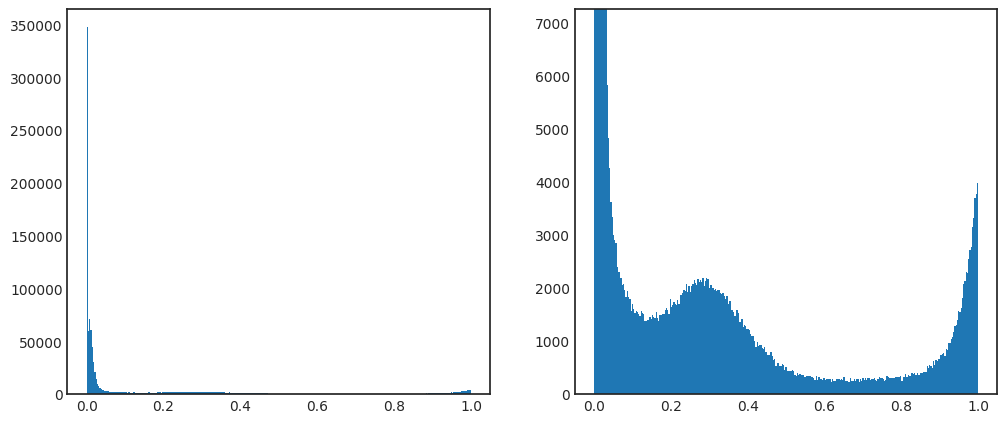

In [0]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

bin_values, _, _ = ax1.hist(A.flatten(), bins='auto')

# limit the y-axis to the value of the 10th bin
ax2.hist(A.flatten(), bins='auto')
ax2.set_ylim([0, bin_values[9]])

plt.show()

### What do the most similar points look like?

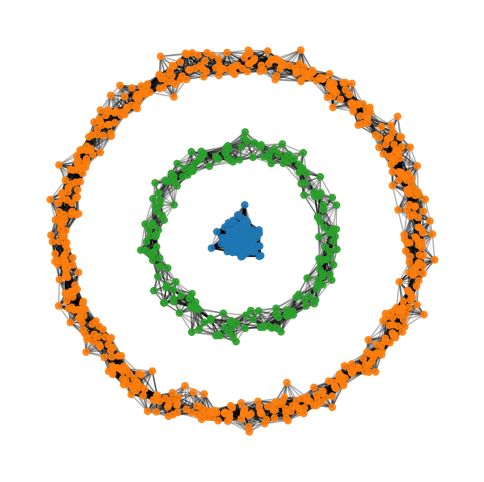

In [0]:
A1 = np.copy(A)
A1[A1 < 0.9] = 0
G = nx.from_numpy_array(A1)

plt.figure(figsize=(6,6))
plt.axis('off')
nx.draw_networkx_nodes(G, pos=X, node_size=20, node_color=y_colors, alpha=0.9)
nx.draw_networkx_edges(G, pos=X, edge_color="black", alpha=0.3)
plt.show()

##Graph Laplacian

In [0]:
I = np.zeros_like(A)
np.fill_diagonal(I, 1)

# degree matrix
D = np.zeros_like(A)
np.fill_diagonal(D, np.sum(A,axis=1))
D_inv_sqrt = np.linalg.inv(np.sqrt(D))

L = I - np.dot(D_inv_sqrt, A).dot(D_inv_sqrt)

###Eigenvalues and Eigenvectors

In [0]:
eigenvalues, eigenvectors = np.linalg.eig(L)
eigenvalues = eigenvalues.real
eigenvectors = eigenvectors.real

# Order the eigenvalues in an increasing order
ind = np.argsort(eigenvalues, axis=0)
eigenvalues_sorted = np.take_along_axis(eigenvalues, ind, axis=0)

# Order the eigenvectors based on the magnitude of their corresponding eigenvalues
eigenvectors_sorted = eigenvectors.take(ind, axis=1)

####Lets look the results

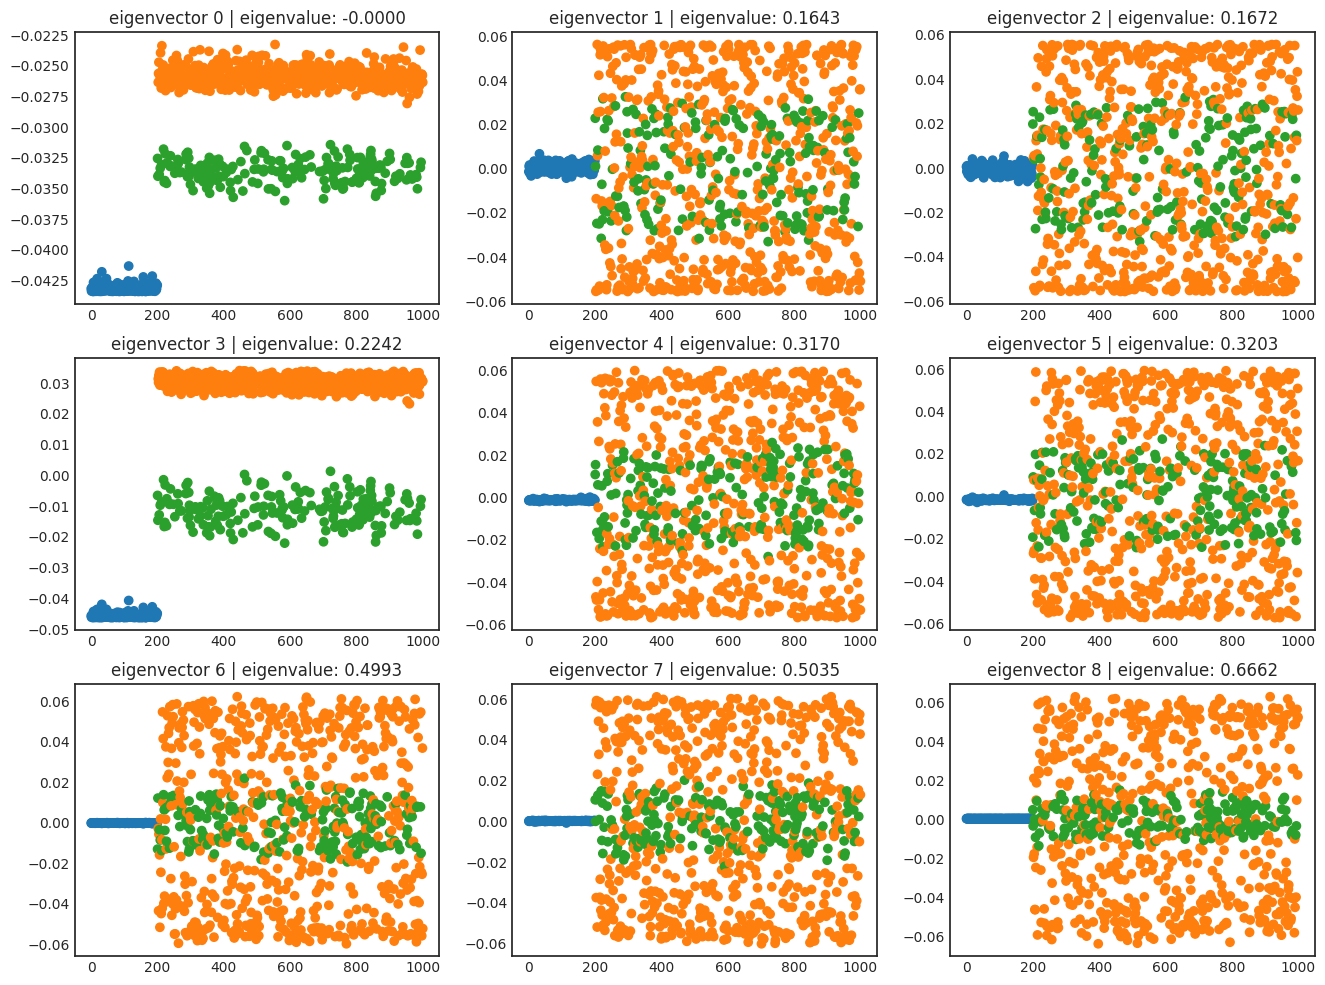

In [0]:
fig, axs = plt.subplots(3, 3, figsize=(16, 12))
eigen_v_x = np.linspace(0, eigenvectors_sorted.shape[0], eigenvectors_sorted.shape[0])

for j, ax in enumerate(fig.axes):
  eigen_v_y = eigenvectors_sorted[:,j]
  ax.scatter(eigen_v_x, eigen_v_y, marker='o', color=y_colors)
  ax.set_title(f'eigenvector {j} | eigenvalue: {eigenvalues_sorted[j]:.4f}')

plt.show()

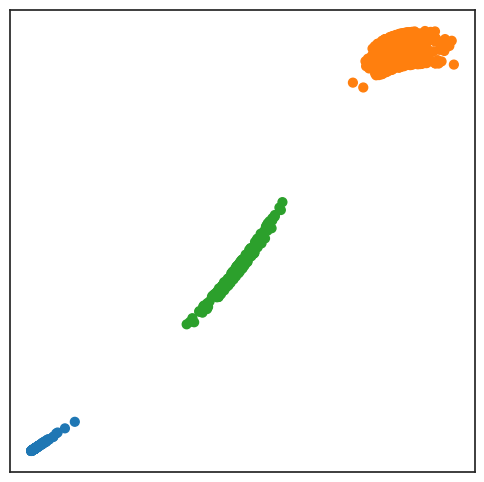

In [0]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(eigenvectors_sorted[:,0], eigenvectors_sorted[:,3], marker='o', s=40, color=y_colors)

ax.tick_params(axis='both',which='both',bottom=False,top=False,left=False,right=False,
            labelbottom=False,labeltop=False,labelleft=False,labelright=False);
ax.set(xlabel=None, ylabel=None)
plt.show()

## Applying K-means

In [0]:
X_transformed = eigenvectors_sorted[:,[0,3]]

scaler = StandardScaler()
scaler.fit(X_transformed)
X_transformed_scaled = scaler.transform(X_transformed)

df_transformed = pd.DataFrame(X_transformed_scaled, columns=['x1', 'x2'])

df_transformed['x1'] = df_transformed['x1'].astype(float)
df_transformed['x2'] = df_transformed['x1'].astype(float)


kmeans = KMeans(n_clusters = 3, random_state = random_seed)

kmeans.fit(df_transformed)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f31c6963640>
Traceback (most recent call last):
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_ca

KMeans(n_clusters=3, random_state=42)

### Results

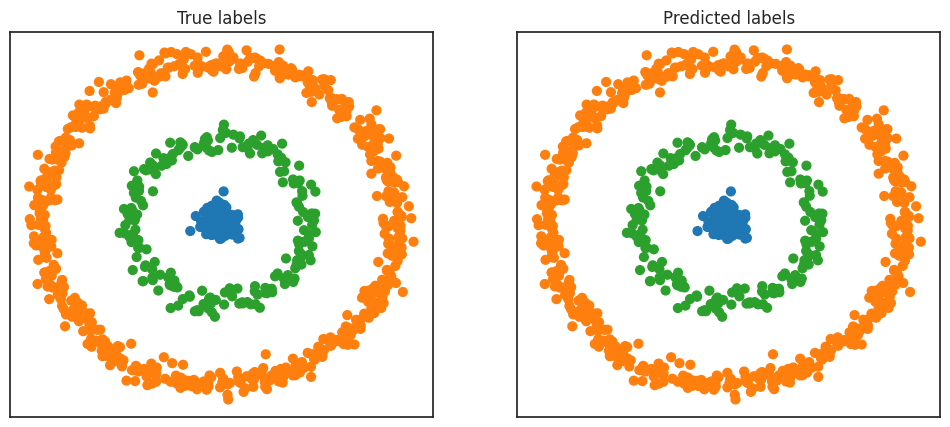

In [0]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.scatter(X[:,0], X[:,1], marker='o', s=40, color=y_colors)
ax1.tick_params(axis='both',which='both',bottom=False,top=False,left=False,right=False,
            labelbottom=False,labeltop=False,labelleft=False,labelright=False);
ax1.set(xlabel=None, ylabel=None)
ax1.set_title('True labels')

ax2.scatter(X[:,0], X[:,1], marker='o', s=40, color=np.array(plot_colors)[kmeans.labels_])
ax2.tick_params(axis='both',which='both',bottom=False,top=False,left=False,right=False,
            labelbottom=False,labeltop=False,labelleft=False,labelright=False);
ax2.set(xlabel=None, ylabel=None)
ax2.set_title('Predicted labels')

plt.show()